In [1]:
import numpy as np
from scipy.special import expit

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1,784)


# Normal
#init1 = np.random.randn(784,256)

# Xavier
n_xaiver = 1/np.sqrt(np.prod(X_train.shape))
init1 = np.random.normal(loc=0,scale=n_xaiver,size=(784,256))
layer1 = np.dot(X_train, init1)

# He
n_he = 2/np.sqrt(np.prod(X_train.shape))
init2 = np.random.normal(loc=0,scale=n_xaiver,size=(784,256))
layer2 = np.dot(X_train, init2)

# sigmoid
layer1 = expit(layer1)

# relu
layer2 = np.where(layer2 > 0, layer2, 0)

(array([[4.8708e+04, 6.9790e+03, 3.0940e+03, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.9076e+04, 7.6400e+02, 1.4200e+02, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.9962e+04, 3.8000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [3.4618e+04, 1.3841e+04, 7.6850e+03, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.8753e+04, 1.1910e+03, 5.6000e+01, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.9811e+04, 7.6330e+03, 2.1170e+03, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]]),
 array([0.        , 0.1897784 , 0.3795568 , 0.56933519, 0.75911359,
        0.94889199, 1.13867039, 1.32844879, 1.51822718, 1.70800558,
        1.89778398]),
 <a list of 256 BarContainer objects>)

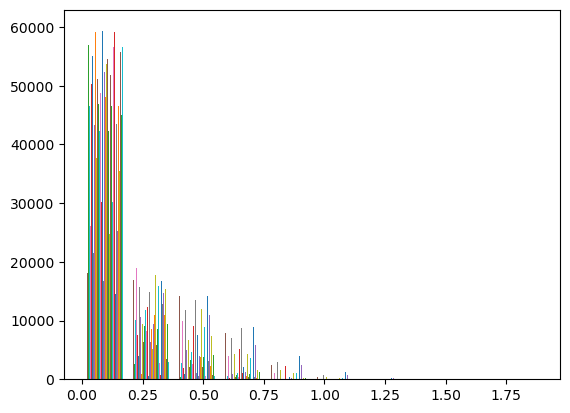

In [4]:
import matplotlib.pyplot as plt
plt.hist(layer2)

In [5]:
from tensorflow.keras.datasets import cifar10

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model, save_model

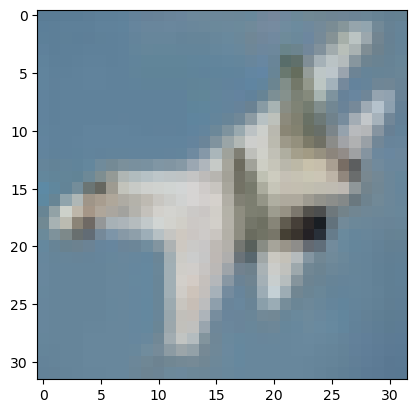

In [8]:
plt.imshow(X_test[10])

In [9]:
cifar10_dic = {
    0 : "airplane",
    1 : "automobile",
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck"
}

In [38]:
cifar10_dic[y_test[10][0]]

'airplane'

In [81]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [82]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

In [83]:
model = Sequential(
[
    Flatten(input_shape=input_shape),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(output_shape, activation = 'softmax')
])

In [84]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [85]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
1563/1563 [==============================] - 9s 5ms/step - loss: 9.5241 - accuracy: 0.2109 - val_loss: 2.2394 - val_accuracy: 0.2357
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0775 - accuracy: 0.2693 - val_loss: 1.9699 - val_accuracy: 0.2862
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0451 - accuracy: 0.2748 - val_loss: 2.1197 - val_accuracy: 0.2098
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0198 - accuracy: 0.2486 - val_loss: 1.9550 - val_accuracy: 0.2649
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9850 - accuracy: 0.2515 - val_loss: 1.9634 - val_accuracy: 0.2429
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9702 - accuracy: 0.2526 - val_loss: 1.9698 - val_accuracy: 0.2476
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9375 - accuracy: 0.2717 - val_loss: 1.9137 - val_ac

In [192]:
def cifar_predict(x):
    x1 = X_test[x]
    y = y_test[x]
    x2 = x1.reshape(-1,32,32,3)
    answer = np.argmax(model.predict(x2))
    print(f'예측한 그림은 {cifar10_dic[answer]} 입니다')
    print(f'정답은 {cifar10_dic[np.argmax(y)]} 입니다')
    if cifar10_dic[answer] == cifar10_dic[np.argmax(y)]:
        print('예측 성공!')
    else:
        print('예측 실패..')
    plt.imshow(x1)
    plt.show()

1/1 [==============================] - 0s 17ms/step
예측한 그림은 truck 입니다
정답은 truck 입니다
예측 성공!


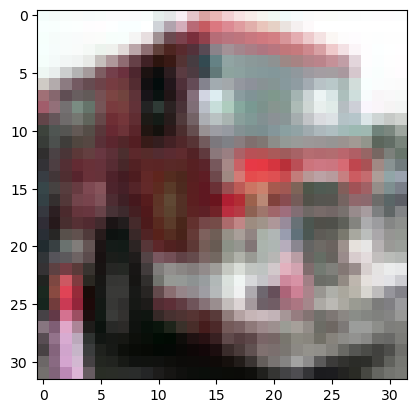

In [202]:
cifar_predict(1104)

In [203]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

In [205]:
model = Sequential(
[
    Flatten(input_shape=input_shape),
    BatchNormalization(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dense(128, activation = 'relu'),
    BatchNormalization(),
    Dense(64, activation = 'relu'),
    BatchNormalization(),
    Dense(output_shape, activation = 'softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.7130 - accuracy: 0.3906 - val_loss: 1.5088 - val_accuracy: 0.4638
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5099 - accuracy: 0.4633 - val_loss: 1.4034 - val_accuracy: 0.5015
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4206 - accuracy: 0.4950 - val_loss: 1.3716 - val_accuracy: 0.5097
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3546 - accuracy: 0.5190 - val_loss: 1.3386 - val_accuracy: 0.5252
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2960 - accuracy: 0.5402 - val_loss: 1.3292 - val_accuracy: 0.5248
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2586 - accuracy: 0.5517 - val_loss: 1.3042 - val_accuracy: 0.5336
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2076 - accuracy: 0.5710 - val_loss: 1.2935 - val_ac

1/1 [==============================] - 0s 17ms/step
예측한 그림은 truck 입니다
정답은 truck 입니다
예측 성공!


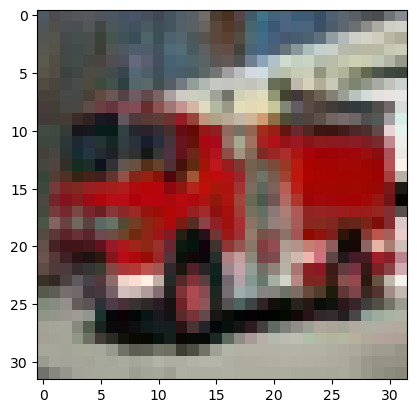

In [228]:
cifar_predict(23)

In [236]:
save_model(model,'model/model.h6')

INFO:tensorflow:Assets written to: model/model.h6\assets


INFO:tensorflow:Assets written to: model/model.h6\assets


In [237]:
cifar_model = load_model('model/model.h5')

In [241]:
np.argmax(cifar_model.predict(X_test[[1]]))

1/1 [==============================] - 0s 16ms/step


9

In [242]:
cifar10_dic[np.argmax(cifar_model.predict(X_test[[1]]))]

1/1 [==============================] - 0s 17ms/step


'truck'

1/1 [==============================] - 0s 17ms/step
예측한 그림은 ship 입니다
정답은 truck 입니다
예측 실패..


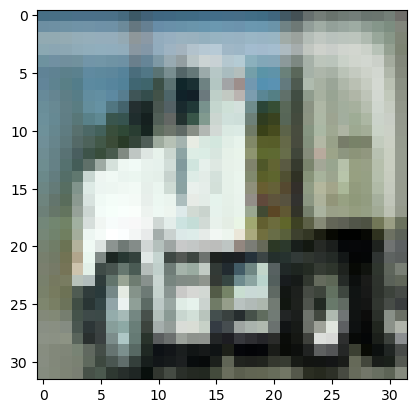

In [278]:
cifar_predict(222)